<span style="font-family: Verdana; font-weight:bold;font-size:1.3em;color:#B22222;"> Unsupervised Learning - Clustering Techniques
    
<span style="font-family: Verdana; font-weight:bold;font-size:1.0em;color:#4682B4;"> Machine Learning and Artificial Intelligence Course - Texas University
    
<span style="font-family: Verdana;font-size:0.9em;color:#4682B4;"> RAFAEL SOARES DE CARVALHO

<span style="font-family: Verdana; font-weight:bold; font-size:1.2em;color:#B22222;">  Objective: 

To identify different segments in the existing customer based on their spending patterns as well as past interaction with the bank.

### AllLife Credit Card Customer SegmentationBackground


AllLife Bank wants to focus on its credit card customer base in the next financial  year.  They  have  been  advised  by  their  marketing  research  team,  that  the penetration  in  the  market  can  be  improved. Based  on  this  input,  the  Marketing  team proposes to run personalised campaigns to target new customers as well as upsell to existing  customers.  Another  insight from  the market  research  was  that  the  customers perceive the support services of the back poorly. Based on this, the Operations team wants  to  upgrade  the  service  delivery  model,  to  ensure  that  customers  queries  are resolved faster. Head of Marketing and Head of Delivery both decide to reach out to the Data Science team for help.Objective: To identify  different  segments  in  the  existing  customer  based  on  their spending patterns as well as past interaction with the bank. Key Questions:1.How many different segments of customers are there?2.How are these segments different from each other?3.What  are  your recommendations  to  the  bank  on  how  to  better  market  to  and service these customers?Data Description:Data is of various customers of a bank with their credit limit, the total number of credit cards  the  customer  has,  and  different  channels  through  which  customer  has contacted  the  bank  for  any  queries,  different  channels  include  visiting  the  bank, online and through a call centre. 


<span style="font-family: Verdana;font-size:1.2em;color:#B22222;">  STEPS TO FOLLOW
    
    
<span style="font-family: Verdana;font-size:0.9em;color:#4682B4;"> 1. Perform univariate analysis on the data to better understand the variables at your disposal and to get an idea about the no of clusters. Perform EDA, create visualizations to explore data. (10 marks)
    
<span style="font-family: Verdana;font-size:0.9em;color:#4682B4;"> 2. Properly comment on the codes, provide explanations of the steps taken in the notebook and conclude your insights from the graphs. (5 marks)
    
<span style="font-family: Verdana;font-size:0.9em;color:#4682B4;"> 3. Execute K-means clustering use elbow plot and analyse clusters using boxplot (10 marks)
    
<span style="font-family: Verdana;font-size:0.9em;color:#4682B4;"> 4. Execute hierarchical clustering (with different linkages) with the help of dendrogram and cophenetic coeff. Analyse clusters formed using boxplot (15 marks)
    
<span style="font-family: Verdana;font-size:0.9em;color:#4682B4;"> 5. Calculate average silhouette score for both methods. (5 marks)   
      
<span style="font-family: Verdana;font-size:0.9em;color:#4682B4;"> 6. Compare K-means clusters with Hierarchical clusters. (5 marks) 
    
<span style="font-family: Verdana;font-size:0.9em;color:#4682B4;"> 7. Analysis the clusters formed, tell us how is one cluster different from another and answer all the key questions. (10 marks)
    










#### --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

##### Previus Run - Imports Data, Libraries and functions for analysis

In [1]:
#Import Libraries
import warnings
warnings.filterwarnings('ignore')

In [45]:
#Import Libraries
import numpy as np   

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score,roc_curve
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import xgboost as xgb

import statsmodels.api as sm

import pandas as pd    

import matplotlib.pyplot as plt 
%matplotlib inline 

import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

import scipy.stats as stats
from scipy.stats import zscore

from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image  
from sklearn import tree
from os import system

import multiprocessing
from itertools import product

from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.model_selection import GridSearchCV

from sklearn import model_selection
# Remove scientific notations and display numbers with 2 decimal points instead
pd.options.display.float_format = '{:,.2f}'.format

#pip install graphviz
#conda install -c conda-forge mlxtend

from scipy.cluster.hierarchy import cophenet, dendrogram, linkage, fcluster
from scipy.spatial.distance import pdist 

from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
from scipy.cluster import hierarchy

import matplotlib.cm as cm


### Data

In [3]:
#Import Dataset
original_dataset = pd.read_csv("CCCData.csv")  # data as it is - to check consistency
data = pd.read_csv("CCCData.csv") # data to be manipulated

In [4]:
#Check import consistency
data.shape
#Review: Import Validated 660 regs and 7 information collumns

(660, 7)

### 1 - Exploratory Data Quality Report - UNIVARIATE ANALYSIS

In [5]:
#top10 view
data.head(20)
#top 10 rows for data exploration

# Numerical data, named collumns, Some "zeros" information, most single numbers.

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3
5,6,58634,20000,3,0,1,8
6,7,48370,100000,5,0,11,2
7,8,37376,15000,3,0,1,1
8,9,82490,5000,2,0,2,2
9,10,44770,3000,4,0,1,7


In [6]:
# Using only descriptive data - remove customer and row identifiers
data = data.iloc[:, 2:7]

In [7]:
#Check Data Types
data.dtypes

# No need to change data types for now

Avg_Credit_Limit       int64
Total_Credit_Cards     int64
Total_visits_bank      int64
Total_visits_online    int64
Total_calls_made       int64
dtype: object

In [8]:
#Statistical information and summary
data.describe()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.00,660.00,660.00,660.00,660.00
mean,"34,574.24",4.71,2.40,2.61,3.58
std,"37,625.49",2.17,1.63,2.94,2.87
min,"3,000.00",1.00,0.00,0.00,0.00
25%,"10,000.00",3.00,1.00,1.00,1.00
50%,"18,000.00",5.00,2.00,2.00,3.00
75%,"48,000.00",6.00,4.00,4.00,5.00
max,"200,000.00",10.00,5.00,15.00,10.00


In [9]:
#Check Data Infos
data.info()

# there are not nulls values - int64 collums

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Avg_Credit_Limit     660 non-null    int64
 1   Total_Credit_Cards   660 non-null    int64
 2   Total_visits_bank    660 non-null    int64
 3   Total_visits_online  660 non-null    int64
 4   Total_calls_made     660 non-null    int64
dtypes: int64(5)
memory usage: 25.9 KB


In [10]:
#Check Duplicated Rows
dup = data.duplicated()
sum(dup)
#There are no duplicated as we have one line per customer
# 11 costumers with same values - usual and it's not an error

11

In [11]:
#Check for Nulls
nulls = data.isnull().any()
nulls
#Review: no missing values
#bank_adj.isnull().sum()

Avg_Credit_Limit       False
Total_Credit_Cards     False
Total_visits_bank      False
Total_visits_online    False
Total_calls_made       False
dtype: bool

In [12]:
#IQR from each collumm
data.quantile(0.75) - data.quantile(0.25) 

Avg_Credit_Limit      38,000.00
Total_Credit_Cards         3.00
Total_visits_bank          3.00
Total_visits_online        3.00
Total_calls_made           4.00
dtype: float64

In [13]:
#Standard Deviation
print(data.std())

Avg_Credit_Limit      37,625.49
Total_Credit_Cards         2.17
Total_visits_bank          1.63
Total_visits_online        2.94
Total_calls_made           2.87
dtype: float64


In [14]:
#Covariance
cov_data = (data.cov())
cov_data

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Avg_Credit_Limit,"1,415,677,332.51","49,662.22","-6,158.95","60,904.86","-44,670.84"
Total_Credit_Cards,"49,662.22",4.70,1.12,1.07,-4.05
Total_visits_bank,"-6,158.95",1.12,2.66,-2.64,-2.37
Total_visits_online,"60,904.86",1.07,-2.64,8.62,1.07
Total_calls_made,"-44,670.84",-4.05,-2.37,1.07,8.21


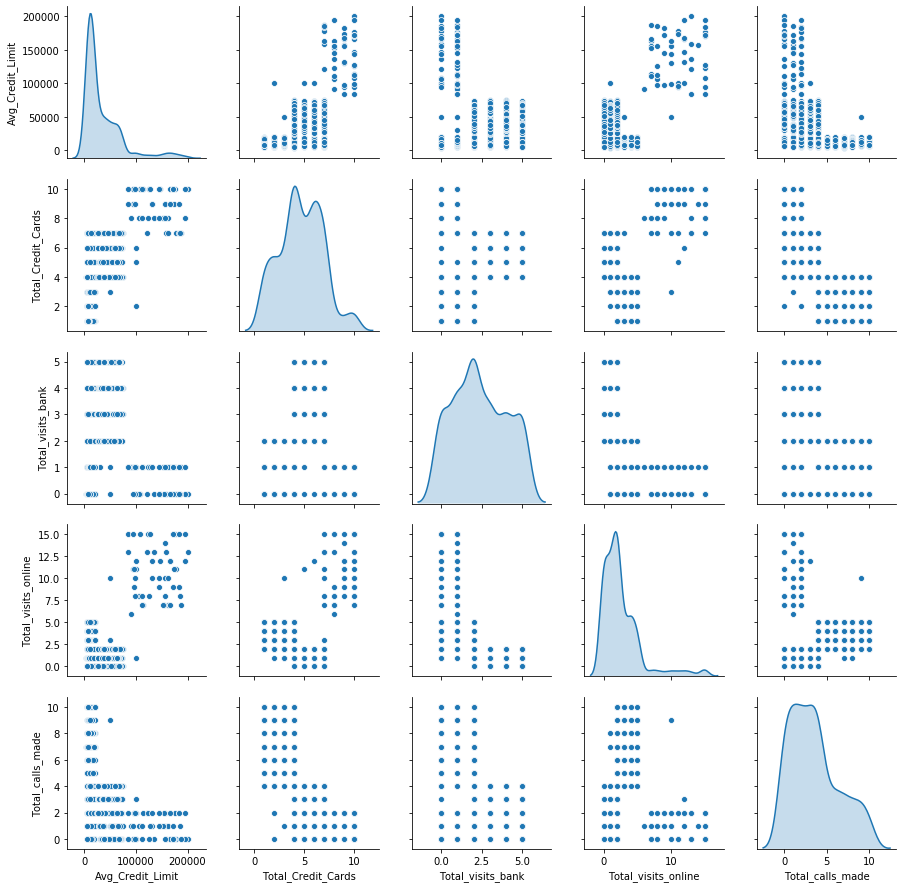

In [15]:
data_attr = data
sns.pairplot(data_attr, diag_kind='kde')

Some information, as Total Credit Card, have more than a curve, wich suggests that we have more than one group in distribution.

In [16]:
data.corr()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Avg_Credit_Limit,1.00,0.61,-0.10,0.55,-0.41
Total_Credit_Cards,0.61,1.00,0.32,0.17,-0.65
Total_visits_bank,-0.10,0.32,1.00,-0.55,-0.51
Total_visits_online,0.55,0.17,-0.55,1.00,0.13
Total_calls_made,-0.41,-0.65,-0.51,0.13,1.00


In [17]:
#skewness of data
data.iloc[:, 2:7].skew()

# simetric >-0.5 and <0.5
# moderate >-1 and <1
#  highly skewed < -1 or > 1

Total_visits_bank     0.14
Total_visits_online   2.23
Total_calls_made      0.66
dtype: float64

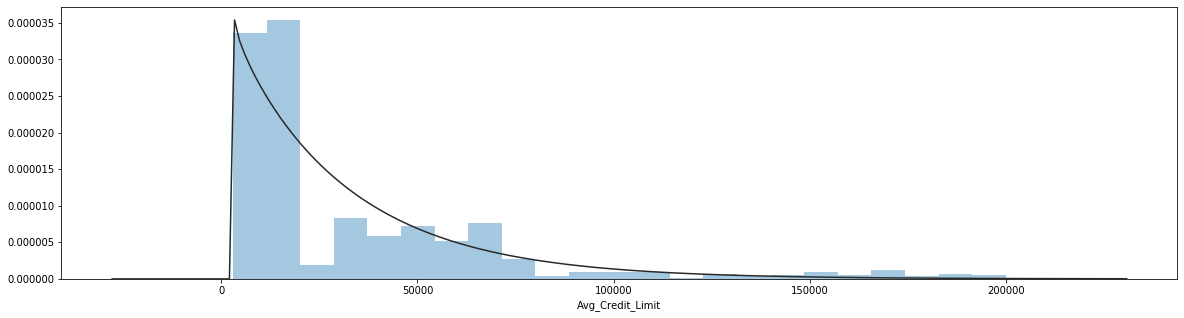

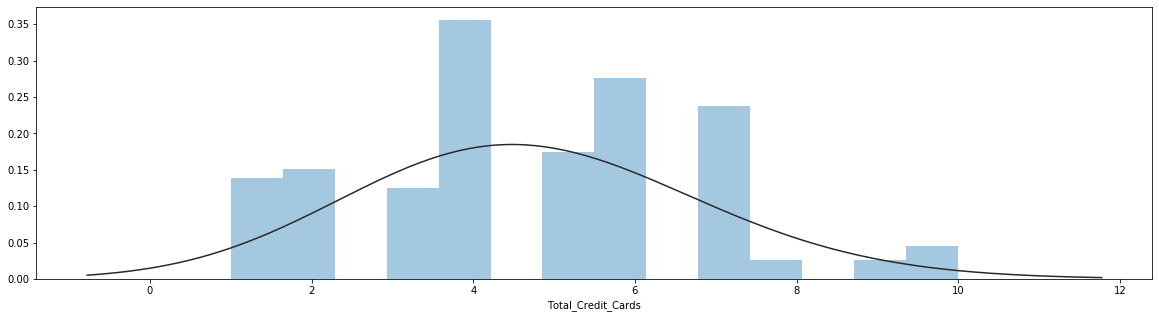

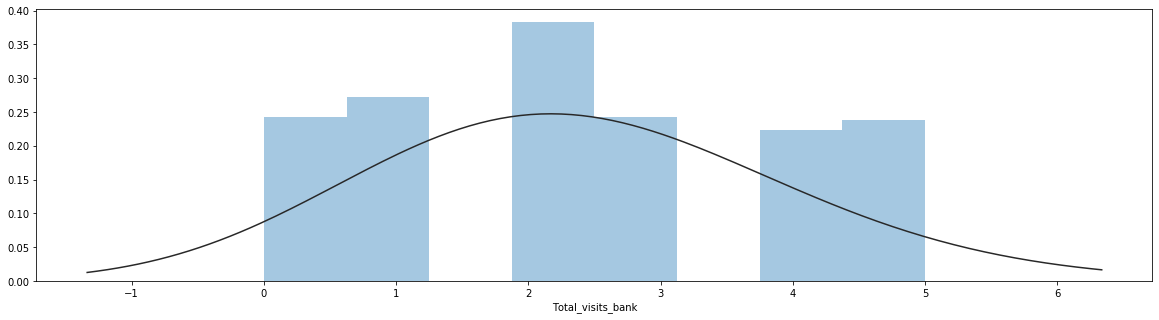

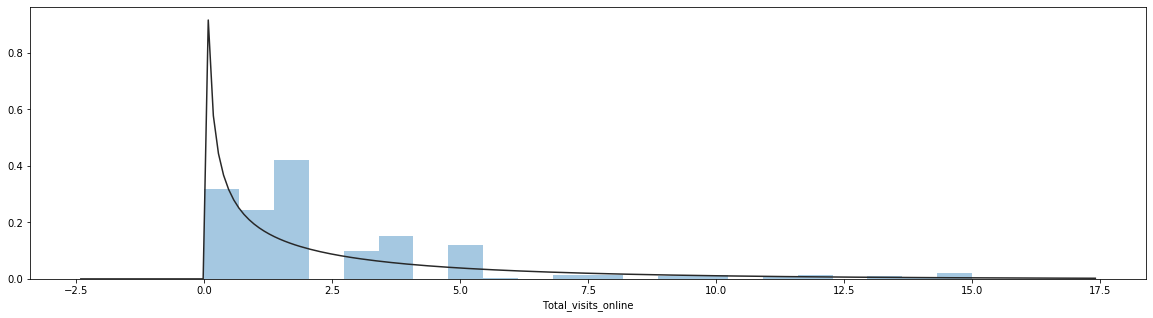

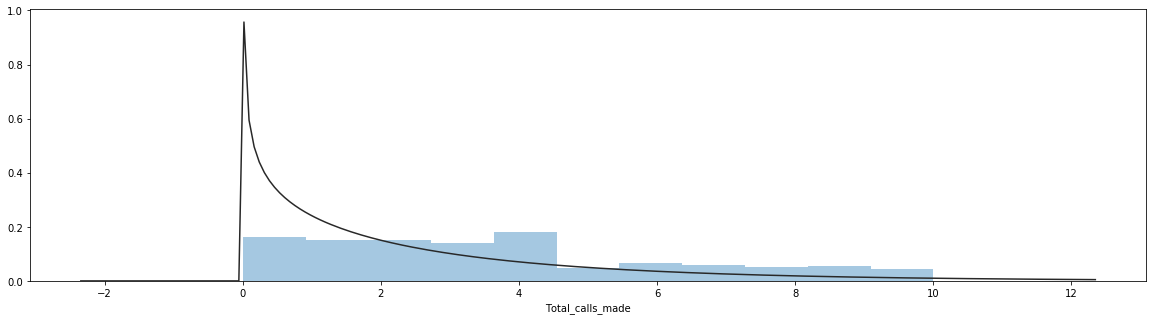

In [18]:
# Distplot for each collumn
for x, y in enumerate(data):
    plt.figure(figsize=(20,5))
    sns.distplot(data[y],fit=stats.gamma,kde=False)
    plt.show()    

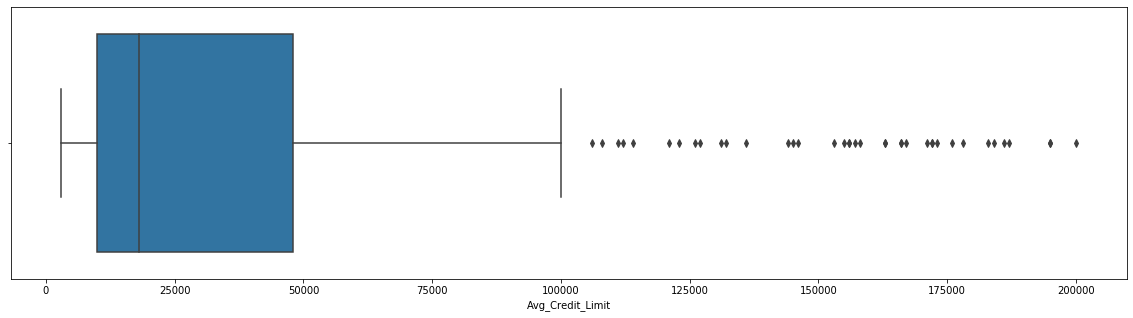

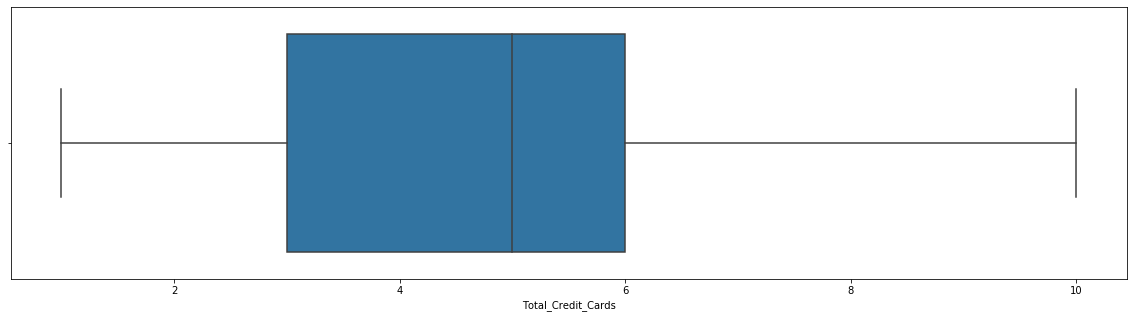

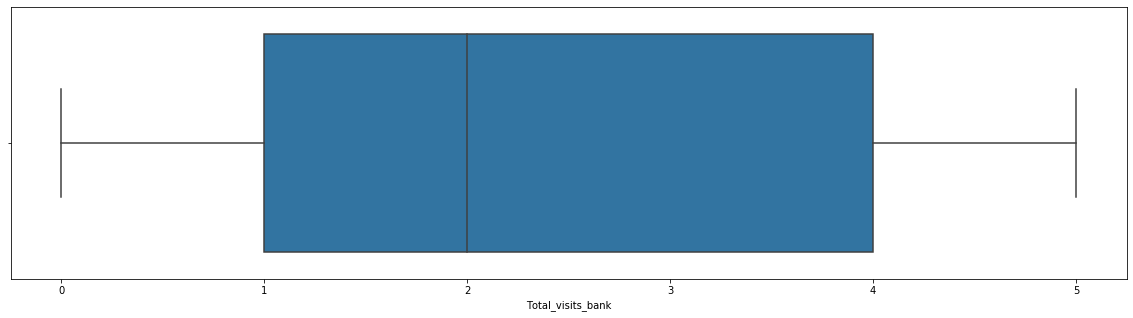

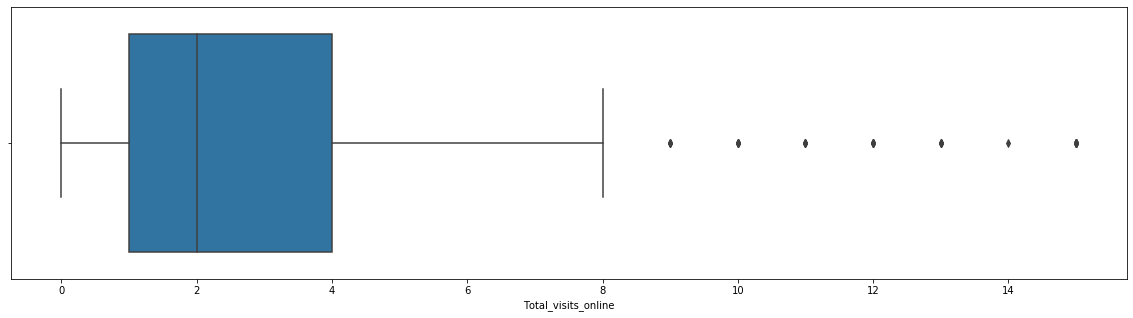

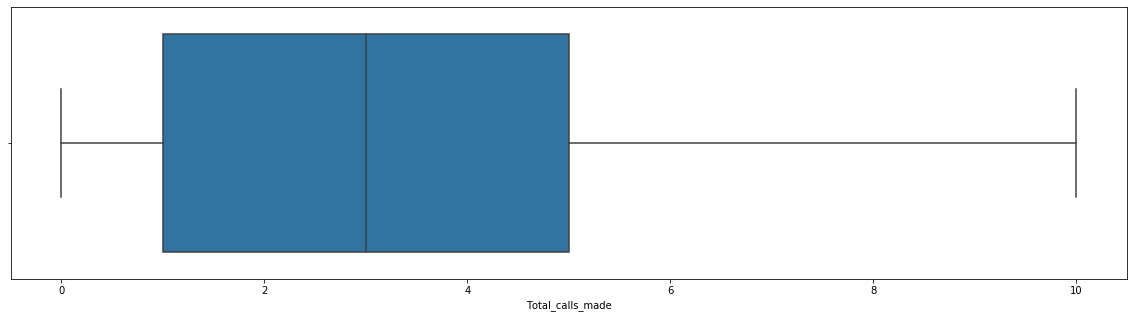

In [19]:
# Boxplot for each collumn
for x, y in enumerate(data):
    plt.figure(figsize=(20,5))
    sns.boxplot(data[y])
    plt.show()    
    


<span style="font-family: Verdana;font-size:1.2em;color:#B22222;">  RESUME - Data Analysis and insights :

    
    AVG Credit limit has a lot of outliers - its usual on Banks. Data so skewed.
    Total Visits Online has outliers too.
    DistPlots suggest that we have a lot of groups with different behaviours.

#### --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### 2 - Exploratory Data Quality Report - BIVARIATE ANALYSIS

<span style="font-family: Verdana;font-size:1em;color:#E41414;"> ANALYSIS before the graphs,  in this standard of information.

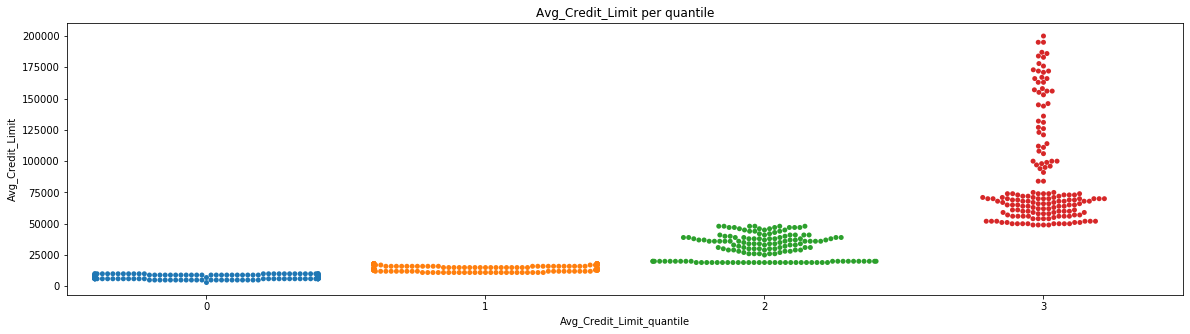

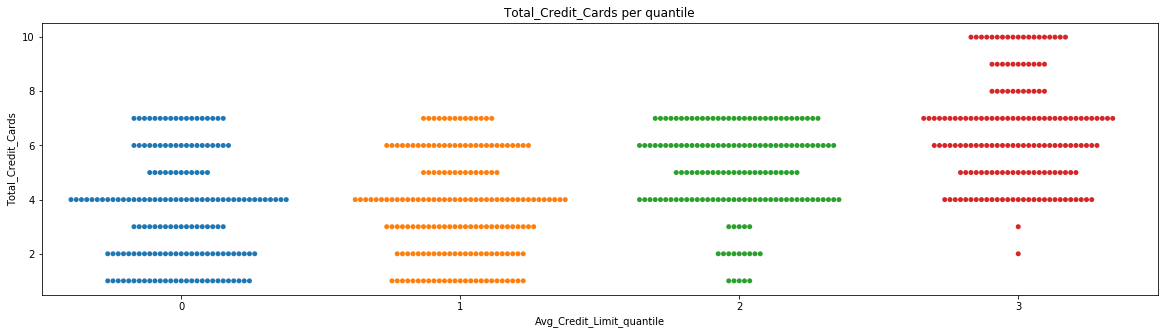

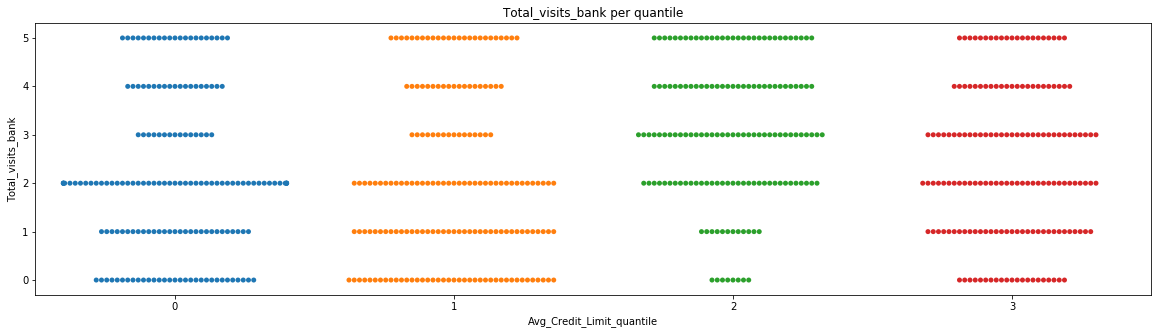

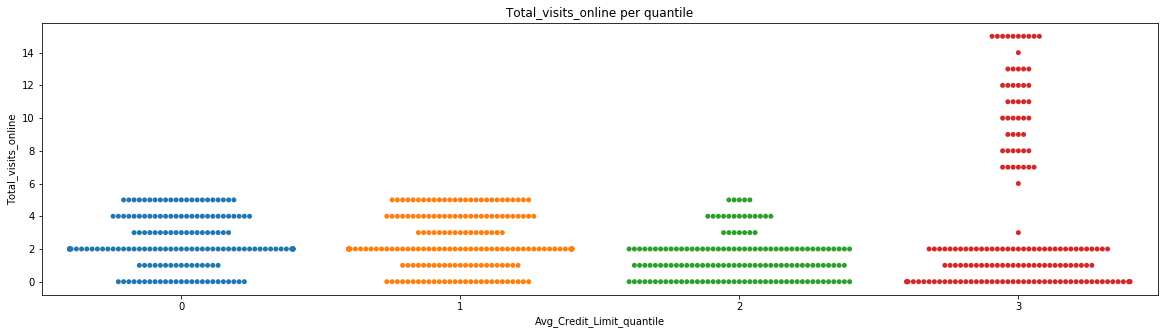

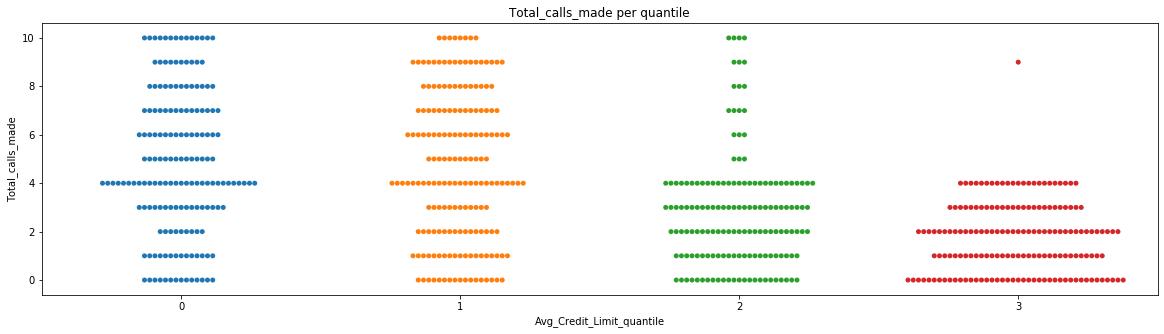

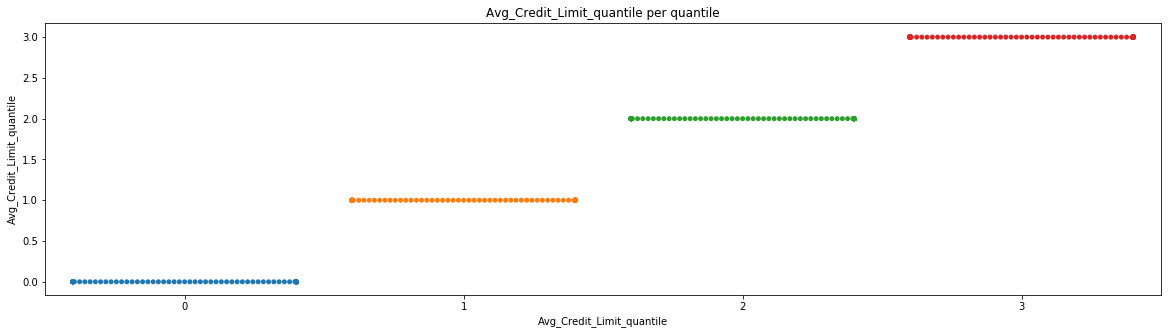

In [20]:
# Swarm for each collumn vs Quantile of Avg_Credit_Limit

# Create a collumn for quantile the Avg_Credit_Limit to better view of data

data['Avg_Credit_Limit_quantile'] =  pd.qcut(data['Avg_Credit_Limit'],4, labels=False)

for a, b in enumerate(data):
    plt.figure(figsize=(20,5))
    sns.swarmplot(y= data[b], x= data['Avg_Credit_Limit_quantile']) 
    plt.title(b + ' per quantile')
    plt.show()

In [21]:
data.head(1)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Avg_Credit_Limit_quantile
0,100000,2,1,1,0,3


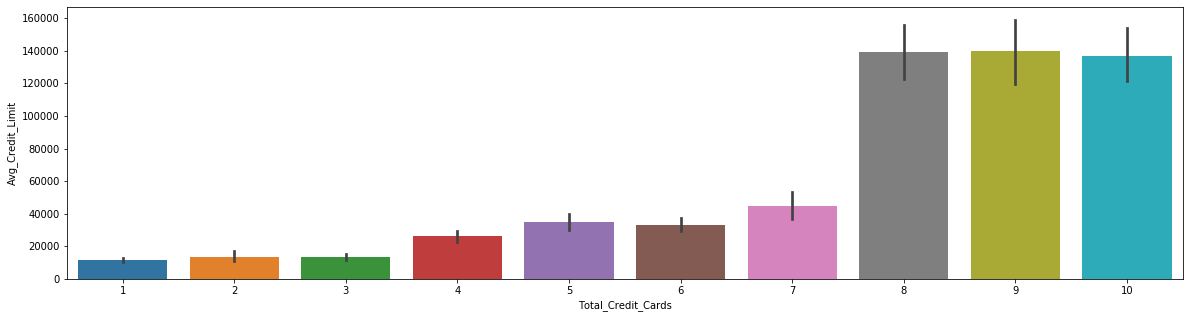

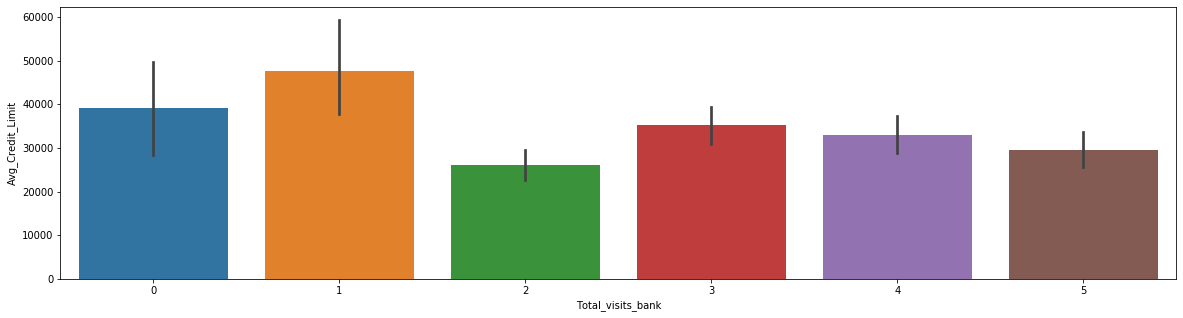

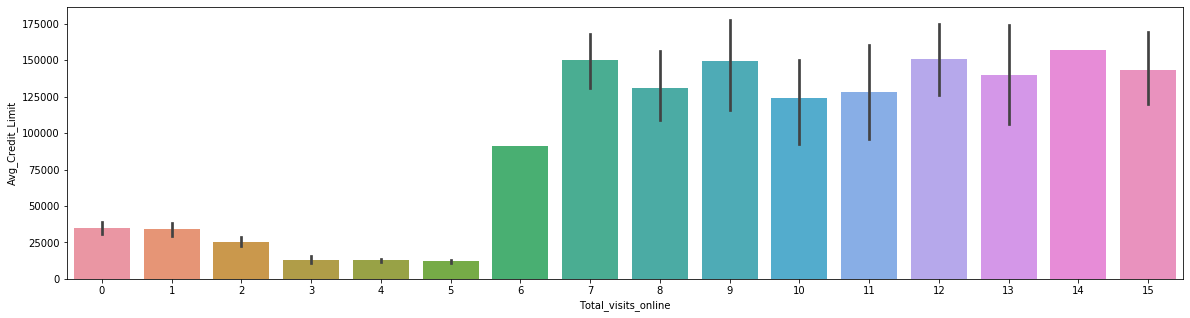

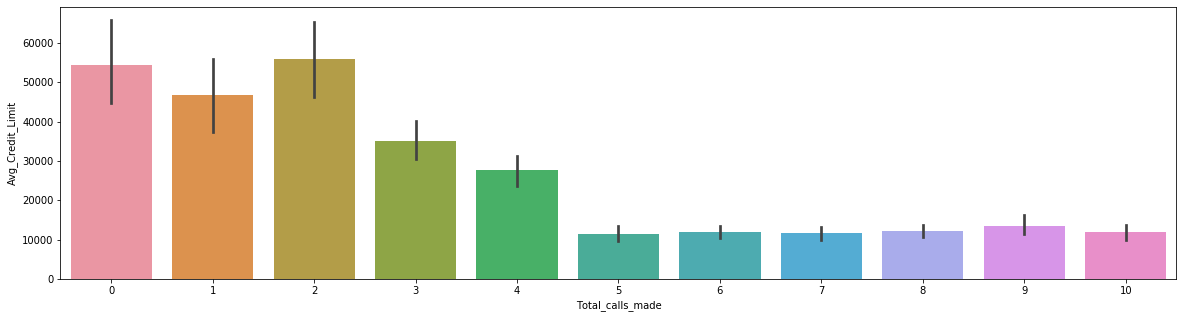

In [22]:
# Contact Variables
Cat_Vars = ['Total_Credit_Cards','Total_visits_bank','Total_visits_online','Total_calls_made']

# Countplot
for x, y in enumerate(Cat_Vars):
    plt.figure(figsize=(20,5))
    sns.barplot(x= data[y],  y="Avg_Credit_Limit", data= data)
    plt.show()

    Customers with more credit cards have more credit limits.
    Visits on bank is well distributed amoung the credit limits.
    Customers with more credit uses more Online Channels.
    Low Credit Limit customers handles more calls.

<Figure size 2160x720 with 0 Axes>

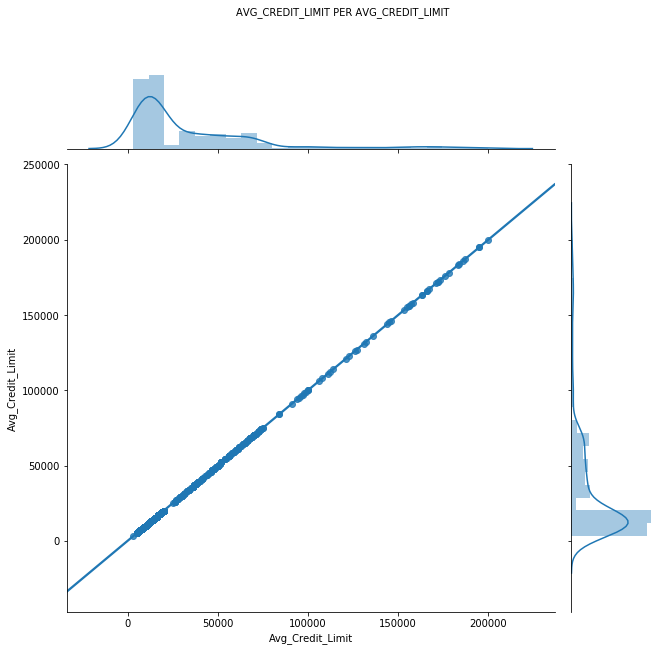

<Figure size 2160x720 with 0 Axes>

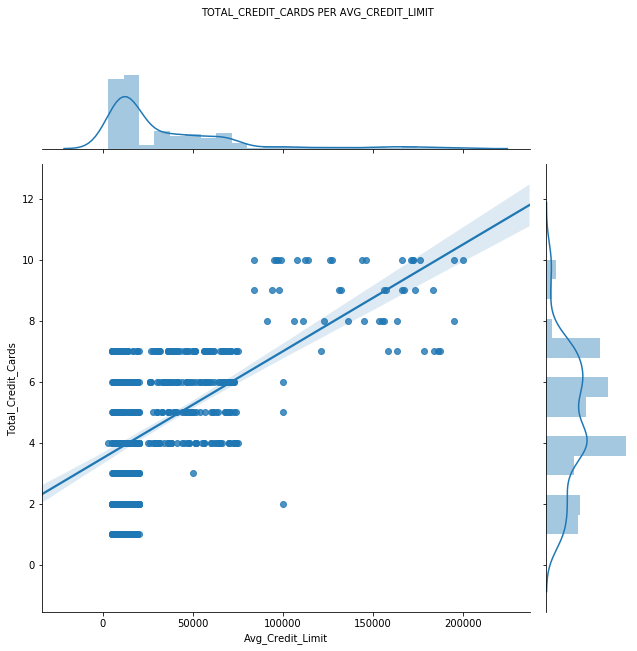

<Figure size 2160x720 with 0 Axes>

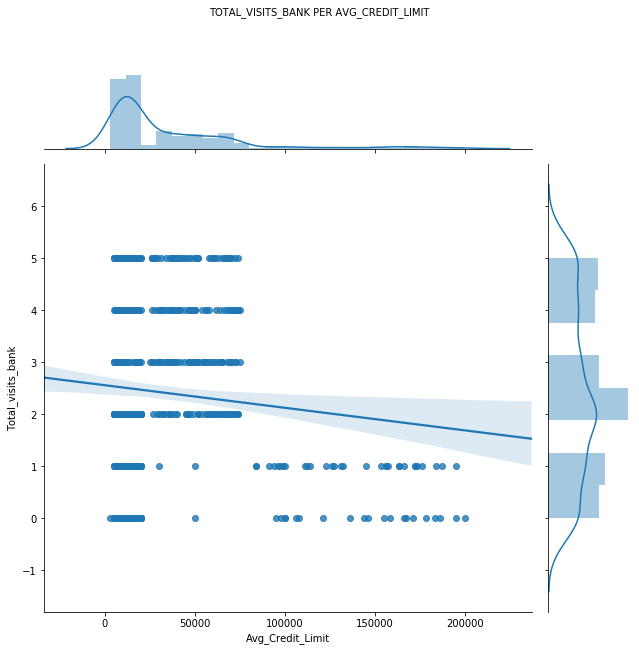

<Figure size 2160x720 with 0 Axes>

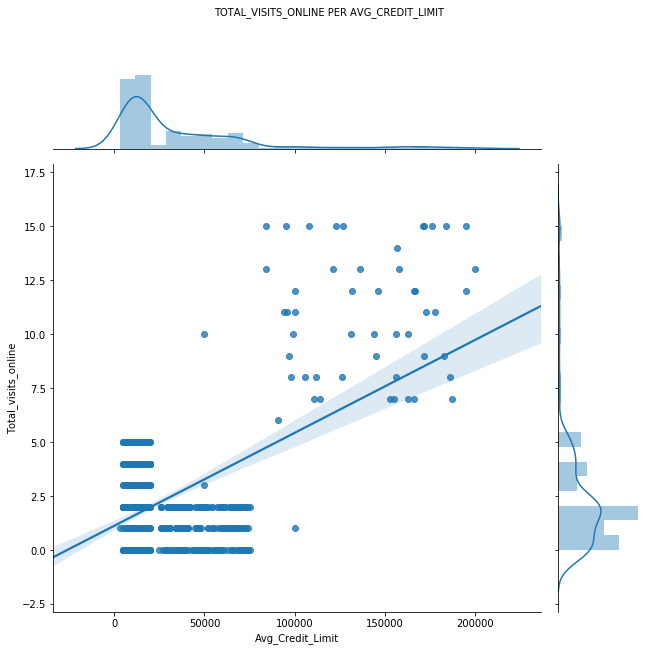

<Figure size 2160x720 with 0 Axes>

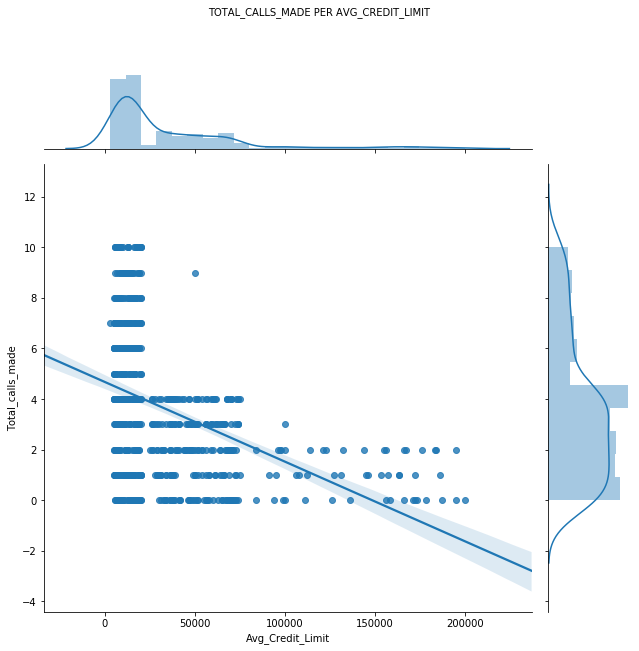

<Figure size 2160x720 with 0 Axes>

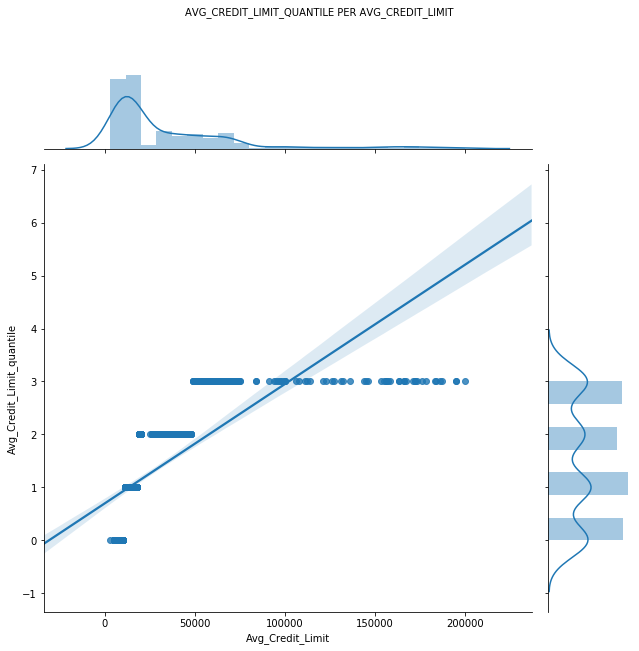

In [23]:
# Jointplot for each collumn vs Avg_Credit_Limit

for a, b in enumerate(data):
    plt.figure(figsize=(30,10))
    sns.jointplot(x='Avg_Credit_Limit', y=b, data=data,kind="reg", height=9)
    plt.suptitle(str.upper(b + ' per Avg_Credit_Limit'), y=1, fontsize = 10)
    plt.subplots_adjust(top=0.9)
    plt.show()
    
    

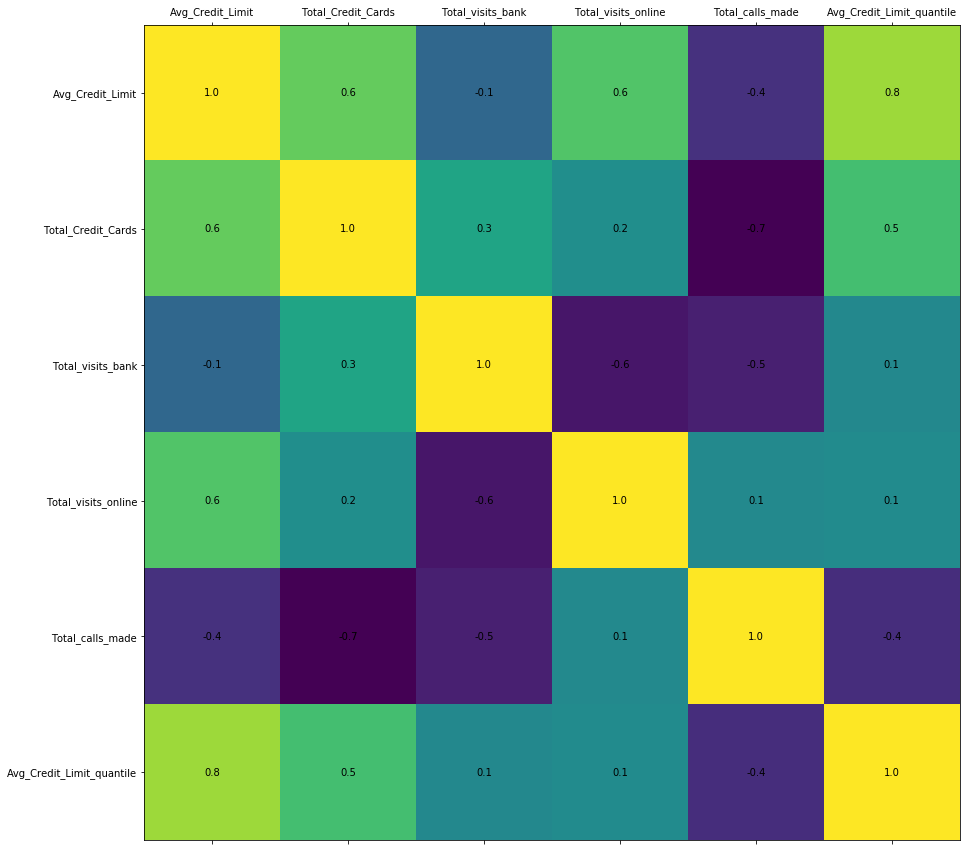

In [24]:
# Graf view of correlation
def plot_correlation(data):
    corr = data.corr()
    fig, ax = plt.subplots(figsize=(30, 15))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    for (i, j), z in np.ndenumerate(corr):
        ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')
        
plot_correlation(data)

In [25]:
corr = data.corr()
print('\n Positive Correlation')
corr >= 0.4


 Positive Correlation


,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Avg_Credit_Limit_quantile
Avg_Credit_Limit,True,True,False,True,False,True
Total_Credit_Cards,True,True,False,False,False,True
Total_visits_bank,False,False,True,False,False,False
Total_visits_online,True,False,False,True,False,False
Total_calls_made,False,False,False,False,True,False
Avg_Credit_Limit_quantile,True,True,False,False,False,True


In [26]:
print('\n Negative Correlation')
corr <= -0.4


 Negative Correlation


,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Avg_Credit_Limit_quantile
Avg_Credit_Limit,False,False,False,False,True,False
Total_Credit_Cards,False,False,False,False,True,False
Total_visits_bank,False,False,False,True,True,False
Total_visits_online,False,False,True,False,False,False
Total_calls_made,True,True,True,False,False,True
Avg_Credit_Limit_quantile,False,False,False,False,True,False


<span style="font-family: Verdana;font-size:1.2em;color:#B22222;">  Bivariate Data Analysis - Correlation Analysis 


#### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------

    More Credit Limit - less handled Calls 
    More Credit Limit - More Credit Cards
    More Online visits or Calls made  - less visits to Bank



---------------------------------------------------------------------------------------------------------------------------------------------------------------------
### 3 - KMEANS CLUSTERING

<span style="font-family: Verdana;font-size:1em;color:#E41414;"> Clustering analysis with KMEANS

---------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [27]:
data.head(1)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Avg_Credit_Limit_quantile
0,100000,2,1,1,0,3


In [28]:
##Scale the data
data_scaled = data.apply(zscore)
data_scaled.describe()


,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Avg_Credit_Limit_quantile
count,660.00,660.00,660.00,660.00,660.00,660.00
mean,0.00,-0.00,0.00,0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00
min,-0.84,-1.71,-1.47,-0.89,-1.25,-1.32
25%,-0.65,-0.79,-0.86,-0.55,-0.90,-1.32
50%,-0.44,0.14,-0.25,-0.21,-0.20,-0.43
75%,0.36,0.60,0.98,0.48,0.49,0.47
max,4.40,2.44,1.59,4.22,2.24,1.36


Text(0.5, 1.0, 'Elbow Method')

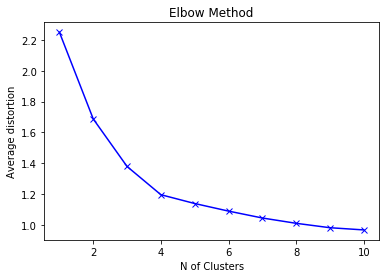

In [29]:
#DESCRIBE NUMBER OF CUSTOMERS TO FIND OPTIMAL VALUES

clusters=range(1,11)
meanDistortions=[]
SEED = 1000

for k in clusters:
    model=KMeans(n_clusters=k, random_state=SEED)
    model.fit(data_scaled)
    prediction=model.predict(data_scaled)
    meanDistortions.append(sum(np.min(cdist(data_scaled, model.cluster_centers_, 'euclidean'), axis=1)) / data_scaled.shape[0])
    

plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('N of Clusters')
plt.ylabel('Average distortion')
plt.title('Elbow Method')


    #print(f"silhouette score at cluster {k}: {silhouette_avg}")
    
    

In [30]:
#Set the value of k=3
kmeans = KMeans(n_clusters=3, n_init = 20, random_state=SEED)
kmeans.fit(data_scaled)
## creating a new dataframe only for labels and converting it into categorical variable
df_labels = pd.DataFrame(kmeans.labels_ , columns = list(['labels']))

df_labels['labels'] = df_labels['labels'].astype('category')
df_labeled = data_scaled.join(df_labels)

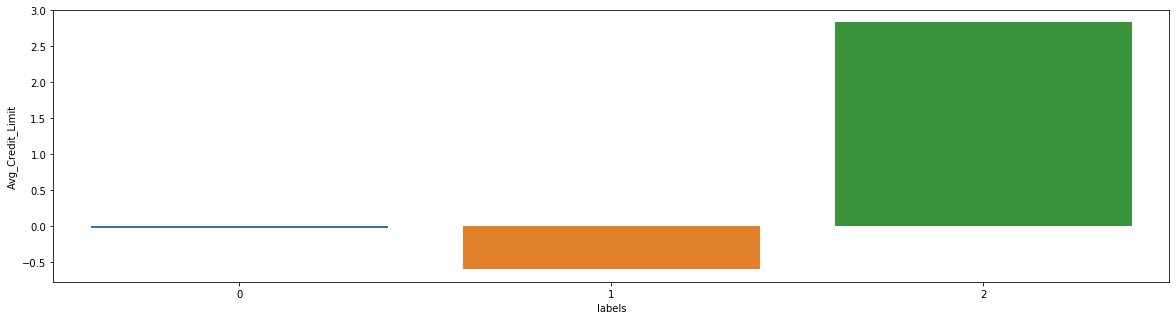

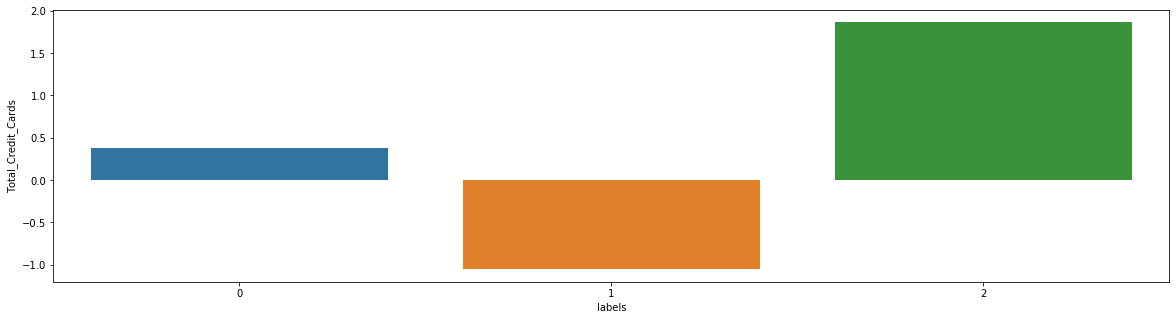

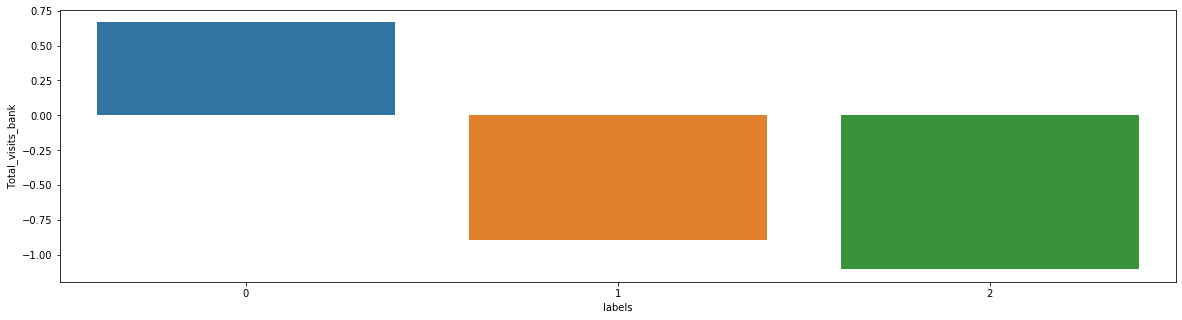

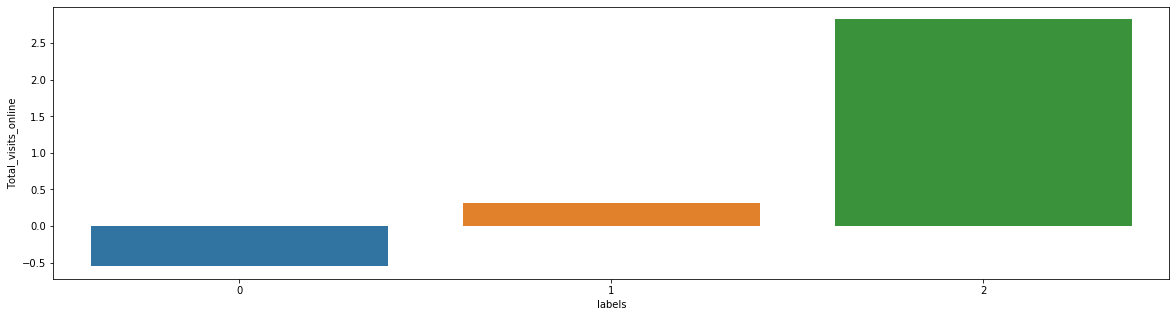

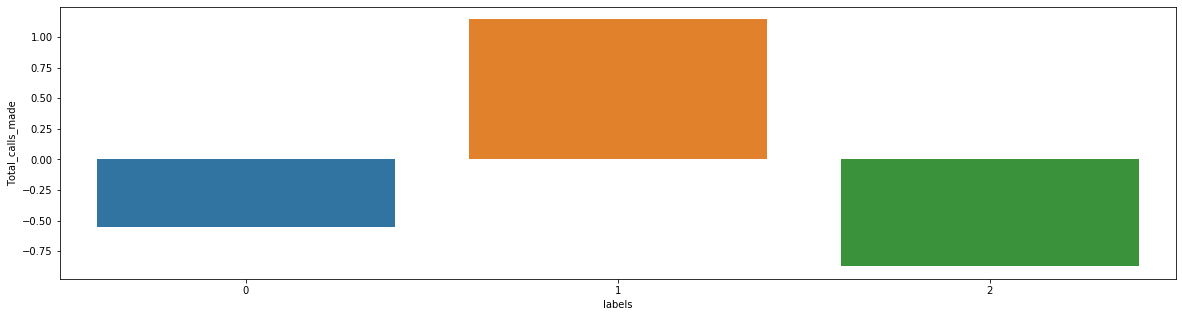

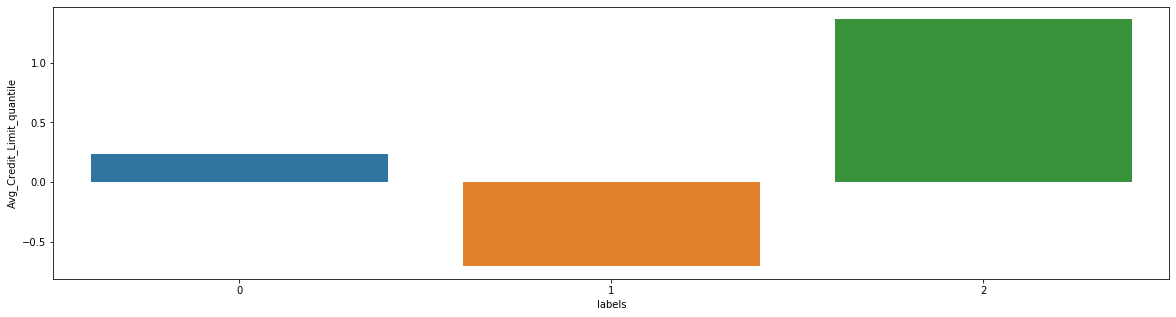

In [31]:
graph_mean = df_labeled.groupby(by='labels').agg('mean')

# Countplot
for x, y in enumerate(graph_mean):
    plt.figure(figsize=(20,5))
    sns.barplot(y= graph_mean[y],  x=graph_mean.index, data= graph_mean)
    plt.show()
    

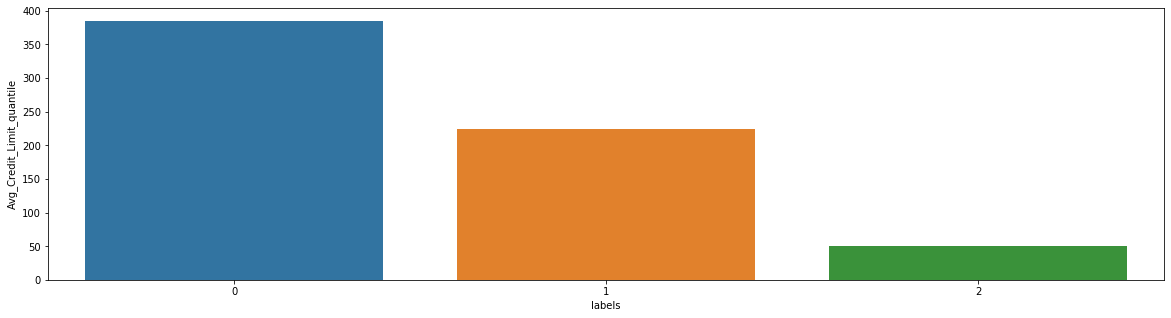

In [32]:
graph_mean = df_labeled.groupby(by='labels').agg('count')

plt.figure(figsize=(20,5))
sns.barplot(y= graph_mean[y],  x=graph_mean.index, data= graph_mean)
plt.show()

<bound method Axes3D.plot of <matplotlib.axes._subplots.Axes3DSubplot object at 0x00000222D7F35668>>

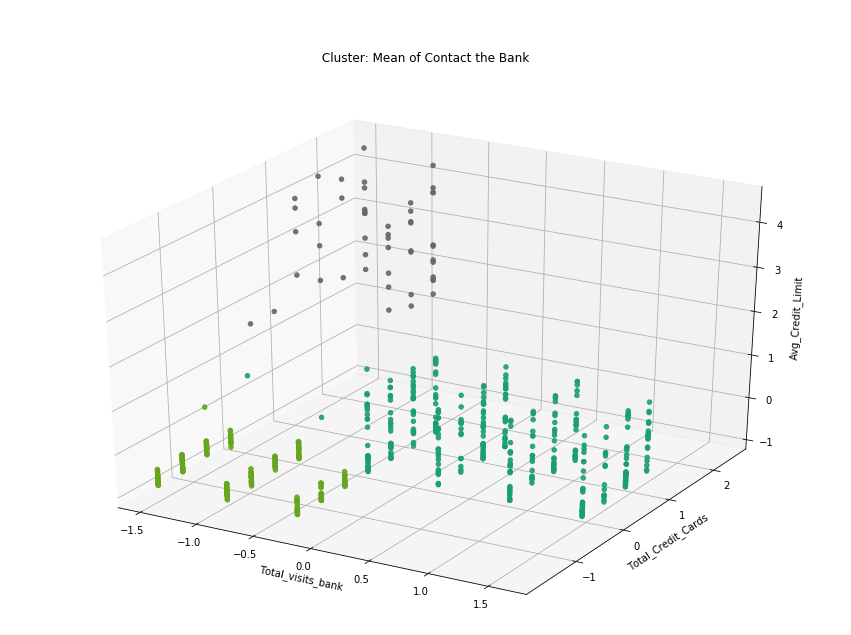

In [53]:
## 3D plots of clusters

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

k3_model=KMeans(3)
k3_model.fit(data_scaled)
labels = k3_model.labels_
z = data_scaled.iloc[:, 0]
y= data_scaled.iloc[:, 1]
x= data_scaled.iloc[:, 2]
    
#c=labels.astype(np.int),
p = ax.scatter(x,y ,z ,s=20,label=0, alpha=0.9, c=labels.astype(np.int),cmap ='Dark2')

ax.set_xlabel('Total_visits_bank')
ax.set_ylabel('Total_Credit_Cards')
ax.set_zlabel('Avg_Credit_Limit')
ax.set_title('\n\n\n Cluster: Mean of Contact the Bank \n\n\n\n')
#ax.view_init(45, 65)
#plt.gca().patch.set_facecolor('black')
ax.plot



<bound method Axes3D.plot of <matplotlib.axes._subplots.Axes3DSubplot object at 0x00000222D801AE48>>

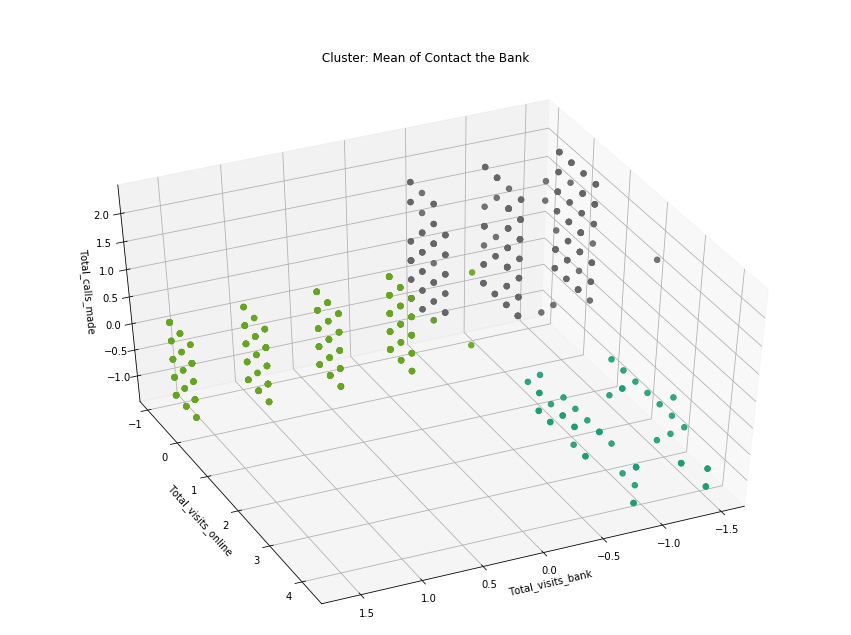

In [55]:
## 3D plots of clusters

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')


k3_model=KMeans(3)
k3_model.fit(data_scaled)
labels = k3_model.labels_
x = data_scaled.iloc[:, 2]
y= data_scaled.iloc[:,3]
z= data_scaled.iloc[:, 4]
p = ax.scatter(x,y ,z ,s=30,label=0, alpha = 0.9, c=labels.astype(np.int),cmap='Dark2')

ax.set_xlabel('Total_visits_bank')
ax.set_ylabel('Total_visits_online')
ax.set_zlabel('Total_calls_made')
ax.set_title('\n\n\n Cluster: Mean of Contact the Bank \n\n\n\n')
ax.view_init(45, 65)
#plt.gca().patch.set_facecolor('black')
ax.plot



For number of clusters = 2 The average silhouette_score is : 0.376
For number of clusters = 3 The average silhouette_score is : 0.464
For number of clusters = 4 The average silhouette_score is : 0.403
For number of clusters = 5 The average silhouette_score is : 0.353
For number of clusters = 6 The average silhouette_score is : 0.262
For number of clusters = 7 The average silhouette_score is : 0.249


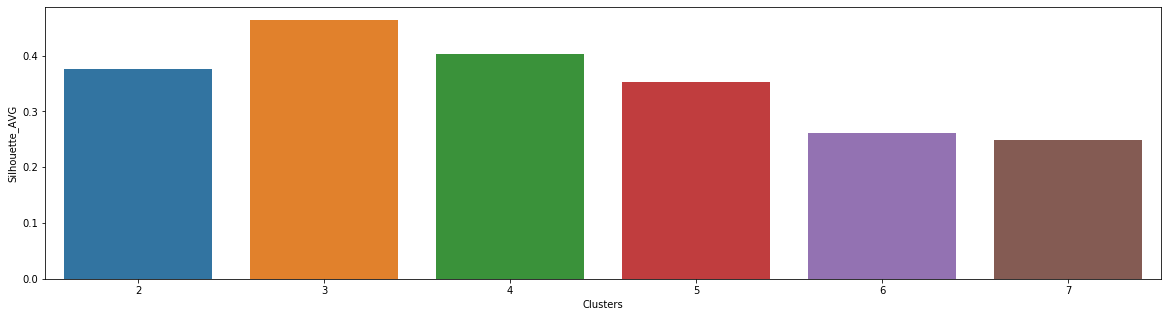

In [35]:
X = data_scaled 
range_n_clusters = [2, 3, 4, 5, 6, 7]

Resume = pd.DataFrame(columns=['Algorithm','Clusters', 'Silhouette_AVG'])
i=0
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=SEED)
    cluster_labels = clusterer.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For number of clusters =", n_clusters,
          "The average silhouette_score is :", round(silhouette_avg,3))
    Resume.loc[i] = ['Kmeans', n_clusters , round(silhouette_avg,3)]
    i=i+1
    

graph_mean = df_labeled.groupby(by='labels').agg('mean')

# Countplot
plt.figure(figsize=(20,5))
sns.barplot(y= Resume.iloc[:,2],  x=Resume.iloc[:,1], data= Resume)
plt.show() 

In [36]:
Resume

,Algorithm,Clusters,Silhouette_AVG
0,Kmeans,2,0.38
1,Kmeans,3,0.46
2,Kmeans,4,0.40
3,Kmeans,5,0.35
4,Kmeans,6,0.26
5,Kmeans,7,0.25


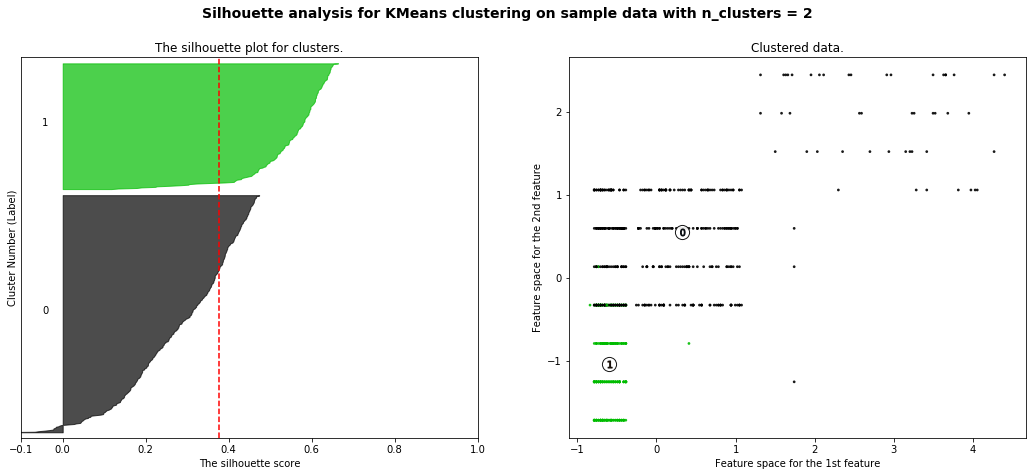

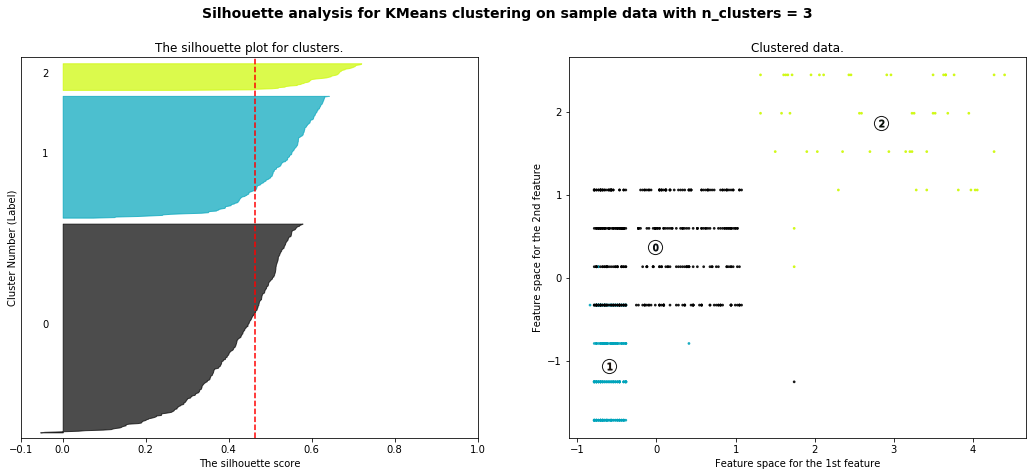

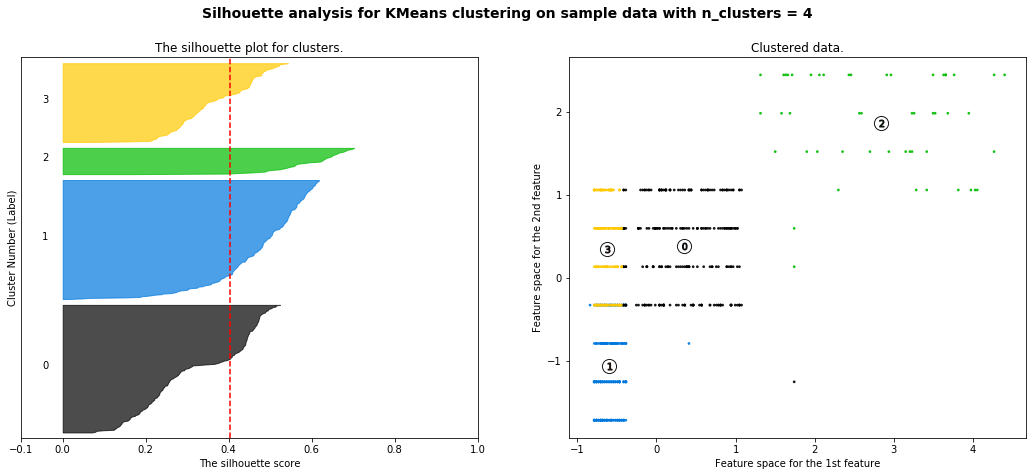

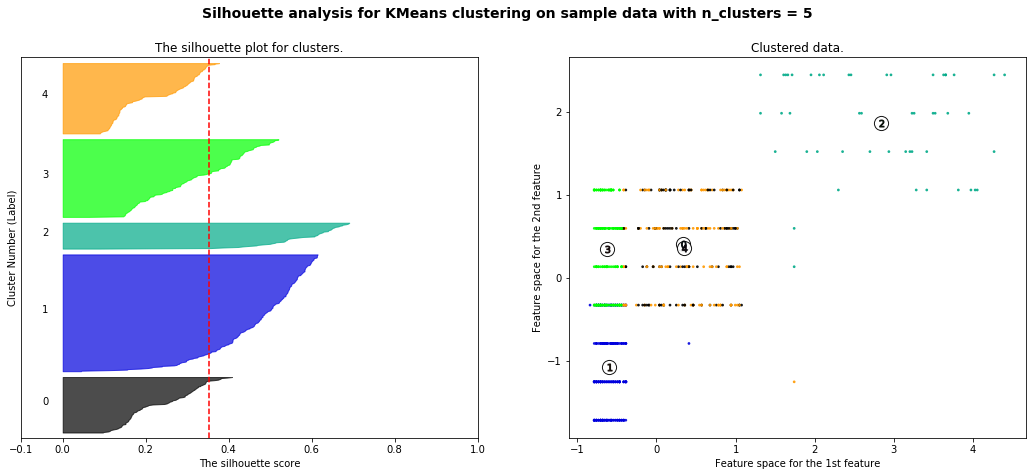

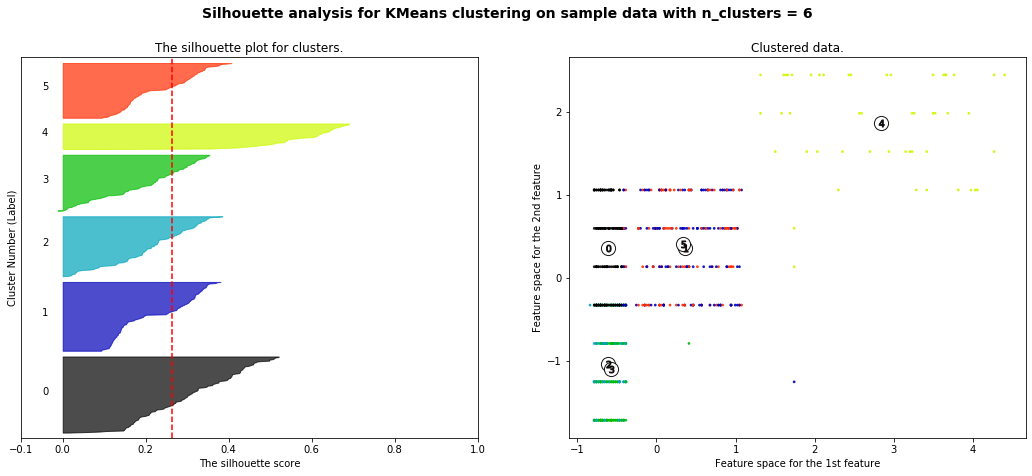

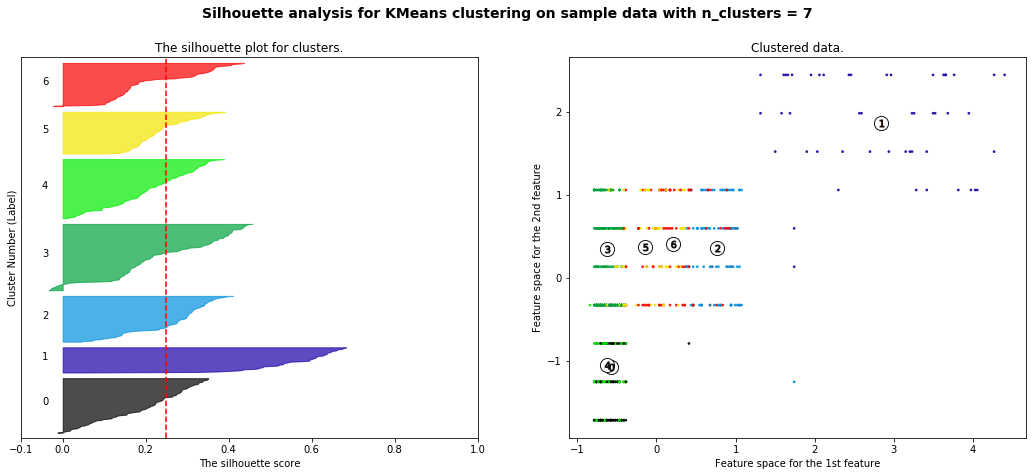

In [37]:
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10]) # *10 to imput a blank space bettween silhouette

    clusterer = KMeans(n_clusters=n_clusters, random_state=SEED)
    cluster_labels = clusterer.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

       
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))  # Label the silhouette plots with their cluster numbers at the middle
        y_lower = y_upper + 10  

    ax1.set_title("The silhouette plot for clusters.")
    ax1.set_xlabel("The silhouette score")
    ax1.set_ylabel("Cluster Number (Label)")
    
     
    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X.iloc[:, 0], X.iloc[:, 1],  marker='.', s=30 , lw=0 , alpha=0.9, c=colors, edgecolor='k' ,cmap='copper_r')
    
    # Labeling the clusters
    centers = clusterer.cluster_centers_
    
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=0.9, s=200, edgecolor='k',cmap='copper_r'
               )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=0.9,
                    s=50, edgecolor='k',cmap='copper_r')
        
        
    ax2.set_title("Clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d\n\n\n" % n_clusters),
                 fontsize=14, fontweight='bold')
    


plt.show()  

---------------------------------------------------------------------------------------------------------------------------------------------------------------------
### 4 - Hierarchical Clustering 

<span style="font-family: Verdana;font-size:1em;color:#E41414;"> Hierarchical Clustering using linkage

---------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [38]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(data_scaled, metric='euclidean', method='average')
c, coph_dists = cophenet(Z , pdist(data_scaled))

print('Cophnet Index=',round(c,2))

clusters = fcluster(Z, 5, criterion='distance')
silhouette_avg = silhouette_score(data_scaled,clusters)

Resume.loc[max(Resume.index)+1] = ['Linkage - Euclidean - Average', max(clusters) , round(silhouette_avg,3)]
print('Silhouette Avg=',round(silhouette_avg,2))    

pd.DataFrame(pd.value_counts(clusters),columns = list(['Count']))

Cophnet Index= 0.88
Silhouette Avg= 0.53


,Count
2,610
1,50


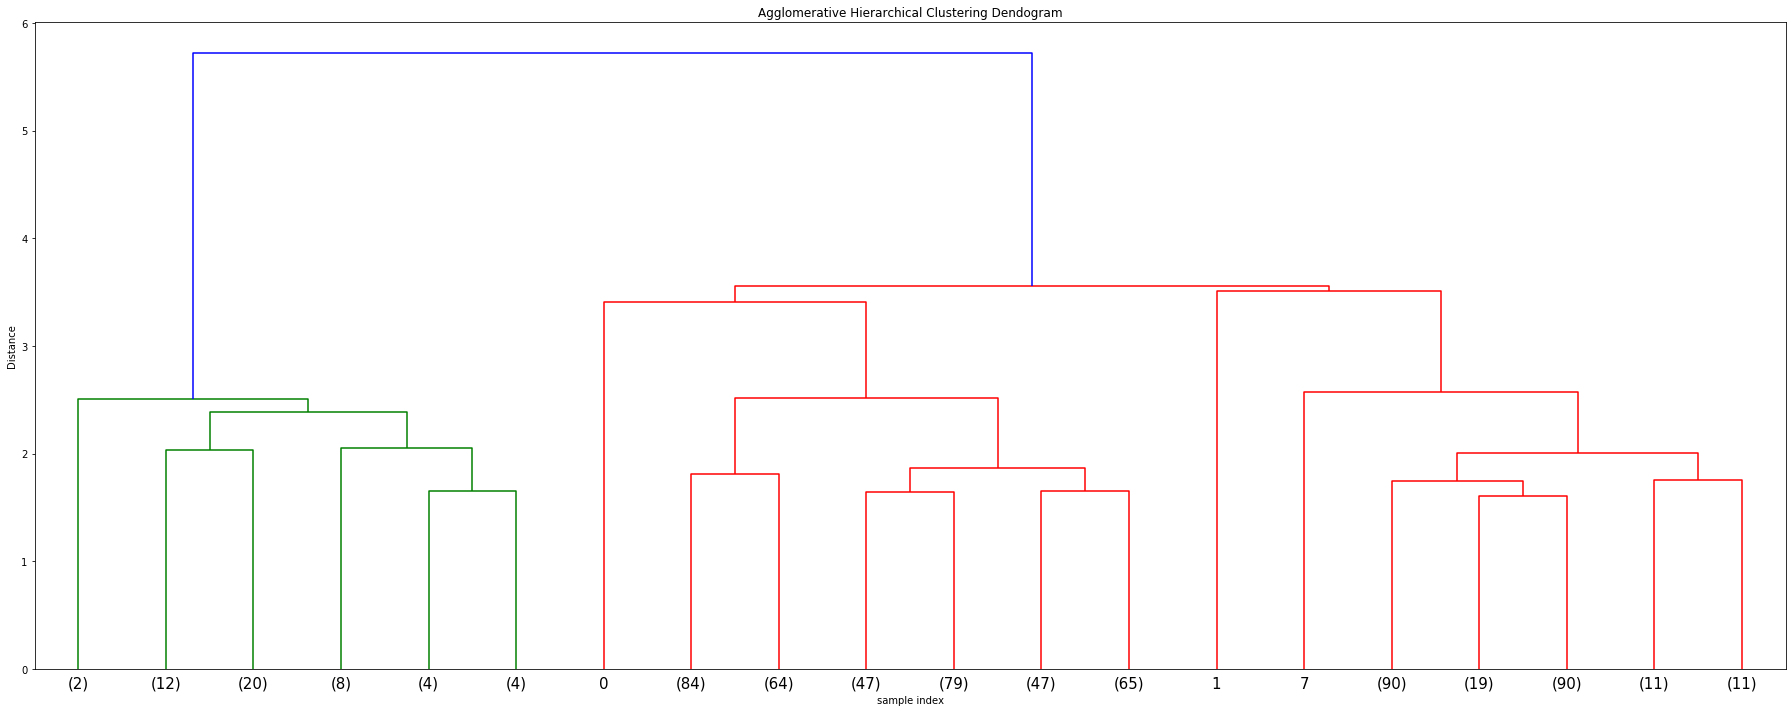

In [39]:
hierarchy.set_link_color_palette(None)  # reset to default after use

plt.figure(figsize=(25, 10))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, truncate_mode='lastp', p=20,leaf_font_size=15)
plt.gca().patch.set_facecolor('white')
       
plt.tight_layout()

In [40]:

Z = linkage(data_scaled, metric='euclidean', method='complete')
c, coph_dists = cophenet(Z , pdist(data_scaled))


print('Cophnet Index=',round(c,2))

clusters = fcluster(Z, 5, criterion='distance')
silhouette_avg = silhouette_score(data_scaled,clusters)

Resume.loc[max(Resume.index)+1] = ['Linkage - Euclidean - Complete', max(clusters) , round(silhouette_avg,3)]
print('Silhouette Avg=',round(silhouette_avg,2))    
pd.DataFrame(pd.value_counts(clusters),columns = list(['Count']))

Cophnet Index= 0.85
Silhouette Avg= 0.4


,Count
4,250
2,223
3,137
1,50


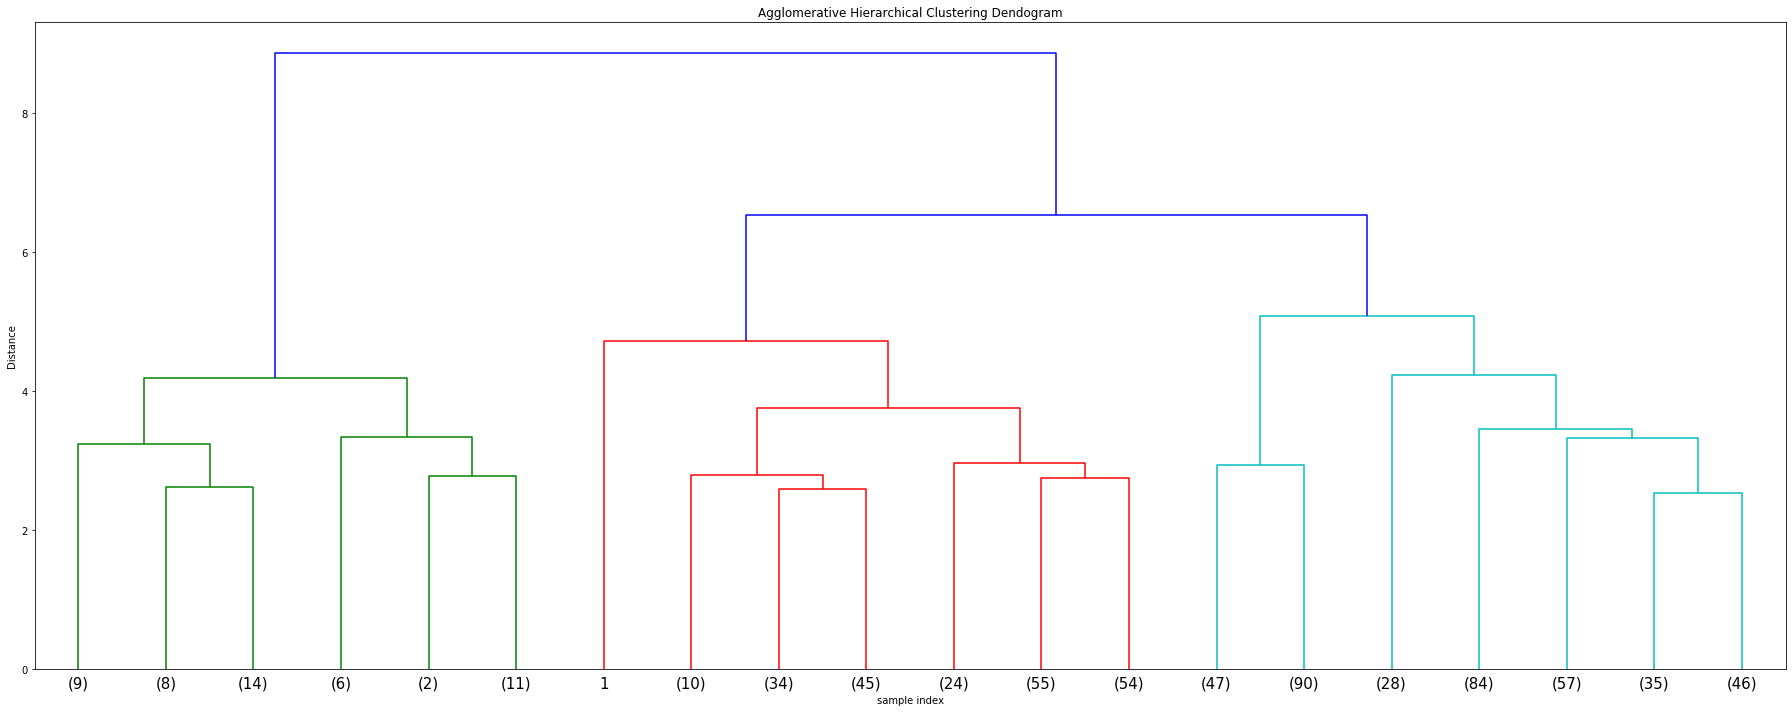

In [41]:
hierarchy.set_link_color_palette(None)  # reset to default after use

plt.figure(figsize=(25, 10))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, truncate_mode='lastp', p=20,leaf_font_size=15)
plt.gca().patch.set_facecolor('white')
       
plt.tight_layout()

In [42]:

Z = linkage(data_scaled, metric='euclidean', method='ward')
c, coph_dists = cophenet(Z , pdist(data_scaled))

print('Cophnet Index=',round(c,2))

clusters = fcluster(Z, 5, criterion='distance')
silhouette_avg = silhouette_score(data_scaled,clusters)

Resume.loc[max(Resume.index)+1] = ['Linkage - Euclidean - Ward', max(clusters) , round(silhouette_avg,3)]
print('Silhouette Avg=',round(silhouette_avg,2))  

pd.DataFrame(pd.value_counts(clusters),columns = list(['Count']))

Cophnet Index= 0.72
Silhouette Avg= 0.18


,Count
5,62
22,55
19,49
18,47
17,40
15,34
14,33
21,32
20,32
4,32


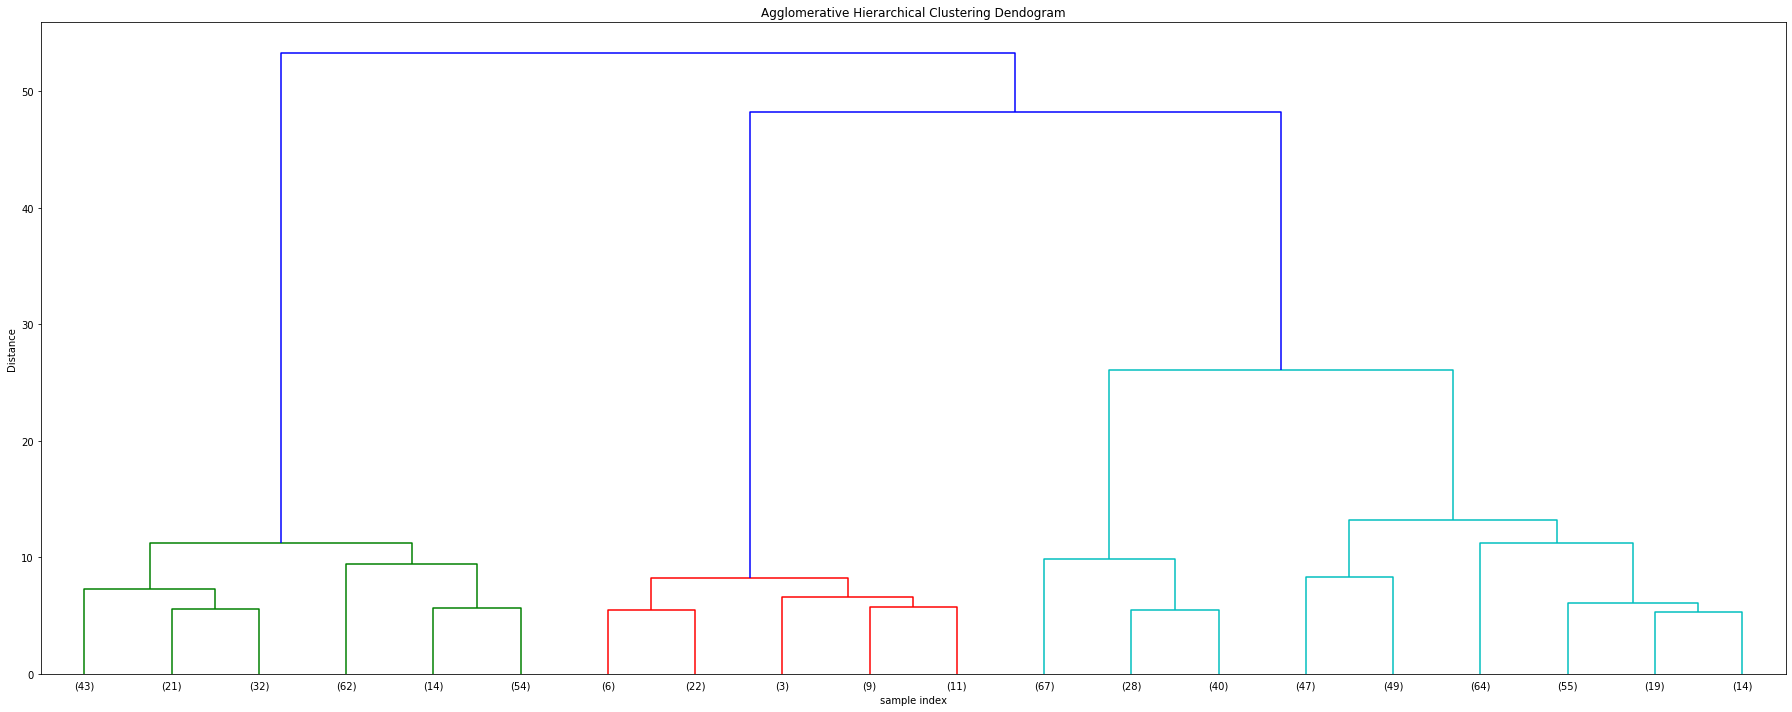

In [43]:
hierarchy.set_link_color_palette(None)  # reset to default after use

plt.figure(figsize=(25, 10))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, truncate_mode='lastp', p=20,leaf_font_size=10)
plt.gca().patch.set_facecolor('white')
       
plt.tight_layout()

---------------------------------------------------------------------------------------------------------------------------------------------------------------------
### 5 - CLUSTERING METHODS COMPARISON

<span style="font-family: Verdana;font-size:1em;color:#E41414;"> Hierarchical Clustering using linkage VS KMEANS

---------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [44]:
Resume

,Algorithm,Clusters,Silhouette_AVG
0,Kmeans,2,0.38
1,Kmeans,3,0.46
2,Kmeans,4,0.40
3,Kmeans,5,0.35
4,Kmeans,6,0.26
5,Kmeans,7,0.25
6,Linkage - Euclidean - Average,2,0.53
7,Linkage - Euclidean - Complete,4,0.40
8,Linkage - Euclidean - Ward,24,0.18


    RESUME> WHAT FITS BETTER TO THIS DATASET IS 'HIERARQUICAL - USING EUCLIDEANS DISTANCE AND AVERAGE METHOD'.
    KMEANS WITH 3 CLUSTERS HAS A GOOD PERFORMANCE TOO.

###    3 GROUPS TO SUGGEST TO BANK LEADERS:

#### CLUSTER 0 - FACE TO FACE GROUP
       MEDIAN CREDIT LIMIT, HIGH LEVEL OF VISIT TO BANK WITH LOW ONLINE OR CALLS USAGE.
       THIS CLUSTER HAS OPPORTUNITY TO INCREASE ONLINE USE AND CREDIT LIMIT.

#### CLUSTER 1 - FRICTION GROUP
        LOW CREDIT LIMIT, HIGH VOLUME OF CALLS AND LOW USE OF ONLINE BANK
        THIS CLUSTER HAS AN OPPOTUNITY TO ONLINE BANKING TO REDUCE BANK COSTS WITH CALLCENTER.
            
#### CLUSTER 2 - BLACK MEMBERSHIP
        HIGH CREDIT LIMIT, LOT OF CREDIT CARDS, NO VISITS TO BANK, ONLINE BANKING USAGE, NO CALLS HANDLED.
        THIS IS THE GROUP TO MANAGE WITH A GREAT RELATIONSHIP PROGRAM FOR INCREAVE LIFE TIME VALUE AND SATISFACTION.